In [24]:
import pandas
import warnings

warnings.simplefilter('ignore')

researched_country = 'Poland'

In [25]:
arrivals2020 = pandas.read_csv('raw_data/raw_arrivals_data/arrivals_2020.csv')
arrivals2021 = pandas.read_csv('raw_data/raw_arrivals_data/arrivals_2021.csv')

arrivals_data = arrivals2020.append(arrivals2021, ignore_index=True)

arrivals_data


,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_ARR_1,DLY_APT_ARR_1,DLY_APT_ARR_A_1,...,DLY_APT_ARR_P_1,DLY_APT_ARR_R_1,DLY_APT_ARR_S_1,DLY_APT_ARR_T_1,DLY_APT_ARR_V_1,DLY_APT_ARR_W_1,DLY_APT_ARR_NA_1,FLT_ARR_1_DLY,FLT_ARR_1_DLY_15,ATFM_VERSION
0,2020,1,JAN,2020-01-01T00:00:00Z,LFRS,Nantes-Atlantique,France,62,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2
1,2020,1,JAN,2020-01-01T00:00:00Z,EDDL,Dusseldorf,Germany,190,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2
2,2020,1,JAN,2020-01-01T00:00:00Z,LGZA,Zakinthos,Greece,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2
3,2020,1,JAN,2020-01-01T00:00:00Z,LIME,Bergamo,Italy,107,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2
4,2020,1,JAN,2020-01-01T00:00:00Z,LGMK,Mikonos,Greece,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176297,2021,10,OCT,2021-10-31T00:00:00Z,LPCS,Cascais,Portugal,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2
176298,2021,10,OCT,2021-10-31T00:00:00Z,EGPH,Edinburgh,United Kingdom,132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2
176299,2021,10,OCT,2021-10-31T00:00:00Z,GMAD,Agadir,Morocco,18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2
176300,2021,10,OCT,2021-10-31T00:00:00Z,LKMT,Ostrava,Czech Republic,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2


In [26]:
arrivals_data = arrivals_data.filter(["FLT_DATE", "APT_NAME", "STATE_NAME", "FLT_ARR_1"])

arrivals_data

,FLT_DATE,APT_NAME,STATE_NAME,FLT_ARR_1
0,2020-01-01T00:00:00Z,Nantes-Atlantique,France,62
1,2020-01-01T00:00:00Z,Dusseldorf,Germany,190
2,2020-01-01T00:00:00Z,Zakinthos,Greece,1
3,2020-01-01T00:00:00Z,Bergamo,Italy,107
4,2020-01-01T00:00:00Z,Mikonos,Greece,4
...,...,...,...,...
176297,2021-10-31T00:00:00Z,Cascais,Portugal,0
176298,2021-10-31T00:00:00Z,Edinburgh,United Kingdom,132
176299,2021-10-31T00:00:00Z,Agadir,Morocco,18
176300,2021-10-31T00:00:00Z,Ostrava,Czech Republic,6


In [27]:
arrivals_data = arrivals_data.drop(arrivals_data[arrivals_data['STATE_NAME'] != researched_country].index)

arrivals_data

,FLT_DATE,APT_NAME,STATE_NAME,FLT_ARR_1
15,2020-01-01T00:00:00Z,Wroclaw/ Strachowice,Poland,28
22,2020-01-01T00:00:00Z,Olsztyn-Mazury,Poland,4
47,2020-01-01T00:00:00Z,Katowice - Pyrzowice,Poland,29
50,2020-01-01T00:00:00Z,Warszawa/ Chopina,Poland,203
69,2020-01-01T00:00:00Z,Poznan - Lawica,Poland,14
...,...,...,...,...
176215,2021-10-31T00:00:00Z,Lublin,Poland,3
176220,2021-10-31T00:00:00Z,Zielona Gora - Babimost,Poland,1
176227,2021-10-31T00:00:00Z,Olsztyn-Mazury,Poland,1
176234,2021-10-31T00:00:00Z,Wroclaw/ Strachowice,Poland,30


(          date  arrivals
 0   2020-01-01       452
 1   2020-01-02       622
 2   2020-01-03       602
 3   2020-01-04       487
 4   2020-01-05       566
 ..         ...       ...
 665 2021-10-27       436
 666 2021-10-28       460
 667 2021-10-29       469
 668 2021-10-30       374
 669 2021-10-31       431
 
 [670 rows x 2 columns],
 <AxesSubplot:xlabel='date'>)

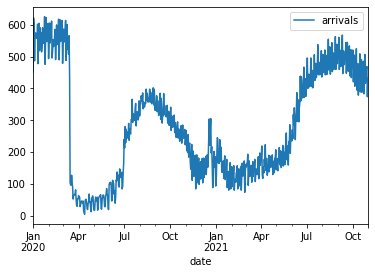

In [28]:
data_arrival_dict = dict()

for index, row in arrivals_data.iterrows():
    date = row['FLT_DATE'][0:10]
    arrivals = row["FLT_ARR_1"]
    if date in data_arrival_dict:
        data_arrival_dict[date] += arrivals
    else:
        data_arrival_dict[date] = arrivals

arrivals_data = pandas.DataFrame(data_arrival_dict.items(), columns=['date', 'arrivals'])

arrivals_data['date'] = pandas.to_datetime(arrivals_data['date'])


arrivals_data, arrivals_data.plot(x = 'date')

In [29]:
covid_data = pandas.read_csv('raw_data/covid_data_raw.csv')

covid_data 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138936,ZWE,Africa,Zimbabwe,2021-12-05,139046.0,523.0,727.857,4710.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138937,ZWE,Africa,Zimbabwe,2021-12-06,139046.0,0.0,688.571,4710.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138938,ZWE,Africa,Zimbabwe,2021-12-07,141601.0,2555.0,996.571,4713.0,3.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138939,ZWE,Africa,Zimbabwe,2021-12-08,150628.0,9027.0,2184.429,4720.0,7.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [30]:
covid_data = covid_data.filter(['location', 'date', 'new_cases'])

covid_data

,location,date,new_cases
0,Afghanistan,2020-02-24,5.0
1,Afghanistan,2020-02-25,0.0
2,Afghanistan,2020-02-26,0.0
3,Afghanistan,2020-02-27,0.0
4,Afghanistan,2020-02-28,0.0
...,...,...,...
138936,Zimbabwe,2021-12-05,523.0
138937,Zimbabwe,2021-12-06,0.0
138938,Zimbabwe,2021-12-07,2555.0
138939,Zimbabwe,2021-12-08,9027.0


In [31]:
covid_data = covid_data.drop(covid_data[covid_data['location'] != researched_country].index)
covid_data['new_cases'] = covid_data['new_cases'].astype(int)

covid_data

,location,date,new_cases
100382,Poland,2020-03-04,1
100383,Poland,2020-03-05,0
100384,Poland,2020-03-06,4
100385,Poland,2020-03-07,0
100386,Poland,2020-03-08,6
...,...,...,...
101023,Poland,2021-12-05,22394
101024,Poland,2021-12-06,13250
101025,Poland,2021-12-07,19369
101026,Poland,2021-12-08,28549


<AxesSubplot:xlabel='date'>

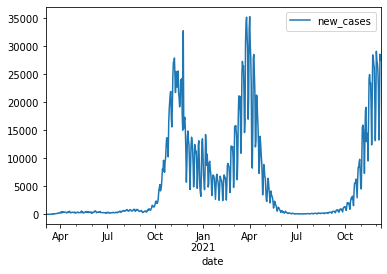

In [32]:
covid_data['date'] = pandas.to_datetime(covid_data['date'])

covid_data.plot(x = 'date')

In [33]:
covid_data = covid_data.drop('location', 1)

merged_data = arrivals_data.merge(covid_data, on='date')

merged_data

,date,arrivals,new_cases
0,2020-03-04,558,1
1,2020-03-05,585,0
2,2020-03-06,614,4
3,2020-03-07,488,0
4,2020-03-08,537,6
...,...,...,...
602,2021-10-27,436,8366
603,2021-10-28,460,8382
604,2021-10-29,469,9403
605,2021-10-30,374,9806


<AxesSubplot:xlabel='date'>

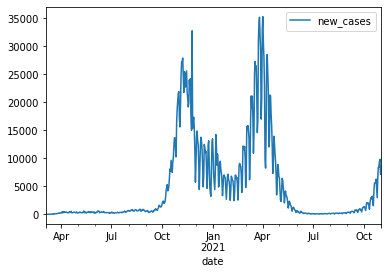

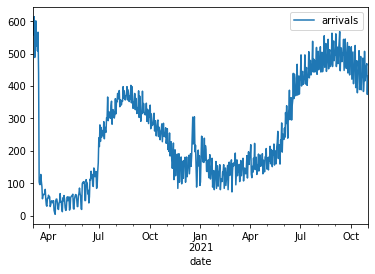

In [34]:
merged_data.plot(x = 'date', y = 'new_cases')
merged_data.plot(x = 'date', y = 'arrivals')

In [35]:
complete_data = merged_data.drop('date', axis=1)
complete_data.index = merged_data['date']

complete_data

,arrivals,new_cases
date,,
2020-03-04,558,1
2020-03-05,585,0
2020-03-06,614,4
2020-03-07,488,0
2020-03-08,537,6
...,...,...
2021-10-27,436,8366
2021-10-28,460,8382
2021-10-29,469,9403


In [36]:
data_split_coefficient = 0.9

train = complete_data[:int(data_split_coefficient * (len(complete_data)))]

train

,arrivals,new_cases
date,,
2020-03-04,558,1
2020-03-05,585,0
2020-03-06,614,4
2020-03-07,488,0
2020-03-08,537,6
...,...,...
2021-08-27,563,254
2021-08-28,460,289
2021-08-29,513,203


In [37]:
valid = complete_data[int(data_split_coefficient * (len(complete_data))):]

valid

,arrivals,new_cases
date,,
2021-09-01,502,366
2021-09-02,497,376
2021-09-03,561,361
2021-09-04,460,388
2021-09-05,501,323
...,...,...
2021-10-27,436,8366
2021-10-28,460,8382
2021-10-29,469,9403


rmse: 56.17741938548905


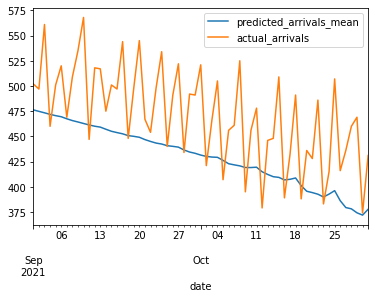

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

def SARIMAX_model(train):
    model = SARIMAX(endog=train.drop('new_cases', axis=1), exog=train['new_cases'])
    model_fit = model.fit()

    return model_fit

test_model = SARIMAX_model(train)

result = test_model.forecast(steps=len(valid), exog=valid['new_cases'])

predicted_arrivals = pandas.DataFrame(result)

predicted_arrivals.plot()
valid['arrivals'].plot()
plt.legend(["predicted_arrivals_mean", "actual_arrivals"])

rmse = math.sqrt(mean_squared_error(predicted_arrivals["predicted_mean"], valid["arrivals"]))
print(f'rmse: {rmse}')

<AxesSubplot:xlabel='date'>

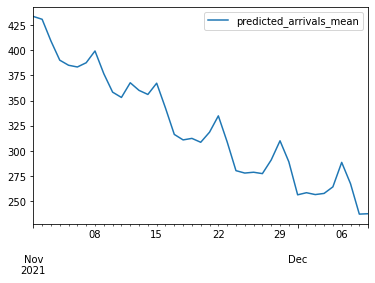

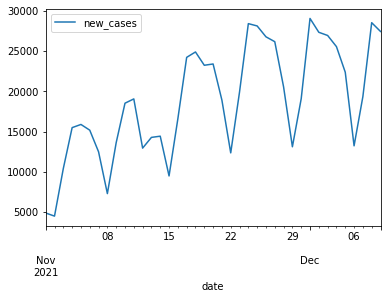

In [39]:
future_covid_data = covid_data.drop(covid_data[covid_data['date'] <= arrivals_data['date'].iat[-1]].index)

exog_covid = future_covid_data.drop('date', axis=1)
exog_covid.index = future_covid_data['date']

prediction_model = SARIMAX_model(complete_data)

result = prediction_model.forecast(steps=len(exog_covid), exog = exog_covid)


prediction = pandas.DataFrame(result)

prediction.plot()
plt.legend(["predicted_arrivals_mean"])
exog_covid.plot()

# update train data until the first day of forecast


<AxesSubplot:>

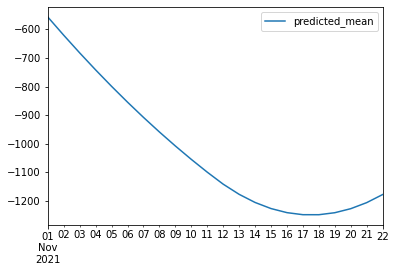

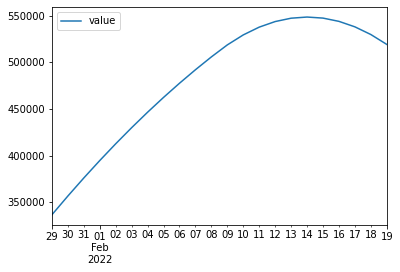

In [40]:
def process_forecast_data(file_location):
    import pandas as pd
    df = pd.read_csv(file_location)

    # remove death records
    df = df[~df.target.str.contains("death")]

    # remove quntile records
    df = df[df.type == 'point']

    forecast_date = df.forecast_date[0]

    df = df.drop(['forecast_date', 'target', 'location', 'quantile', 'scenario_id', 'type'], 1).reset_index(drop=True).rename(columns={'target_end_date': 'date'})

    df.date = pd.to_datetime(df.date)
    # df.plot(x = 'date')
    df.index = df.date
    df = df.drop('date', 1)

    df = df.reindex(pd.date_range(df.index[0],df.index[-1],freq='D'))
    df = df.interpolate(method='quadratic')
    df.value = df.value.astype(int)

    return df

covid_forecast = process_forecast_data('raw_data/2022-01-24-ICM-agentModel.csv')

result = prediction_model.forecast(steps=len(covid_forecast), exog=covid_forecast)

prediction = pandas.DataFrame(result) 

prediction.plot()
covid_forecast.plot()


